Importing th necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import warnings
warnings.filterwarnings('ignore')

Loading the dataset and understaning it features

In [2]:
data= pd.read_csv('marketing_data.csv' )
data

ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
0      1826        1970  Graduation       Divorced  $84,835.00         0   
1         1        1961  Graduation         Single  $57,091.00         0   
2     10476        1958  Graduation        Married  $67,267.00         0   
3      1386        1967  Graduation       Together  $32,474.00         1   
4      5371        1989  Graduation         Single  $21,474.00         1   
...     ...         ...         ...            ...          ...      ...   
2235  10142        1976         PhD       Divorced  $66,476.00         0   
2236   5263        1977    2n Cycle        Married  $31,056.00         1   
2237     22        1976  Graduation       Divorced  $46,310.00         1   
2238    528        1978  Graduation        Married  $65,819.00         0   
2239   4070        1969         PhD        Married  $94,871.00         0   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0            0     6/16/14        0       189  ...                  6   
1            0     6/15/14        0       464  ...                  7   
2            1     5/13/14        0       134  ...                  5   
3            1     5/11/14        0        10  ...                  2   
4            0      4/8/14        0         6  ...                  2   
...        ...         ...      ...       ...  ...                ...   
2235         1      3/7/13       99       372  ...                 11   
2236         0     1/22/13       99         5  ...                  3   
2237         0     12/3/12       99       185  ...                  5   
2238         0    11/29/12       99       267  ...                 10   
2239         2      9/1/12       99       169  ...                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     1             0             0             0   
1                     5             0             0             0   
2                     2             0             0             0   
3                     7             0             0             0   
4                     7             1             0             0   
...                 ...           ...           ...           ...   
2235                  4             0             0             0   
2236                  8             0             0             0   
2237                  8             0             0             0   
2238                  3             0             0             0   
2239                  7             0             1             1   

      AcceptedCmp1  AcceptedCmp2  Response  Complain  Country  
0                0             0         1         0       SP  
1                0             1         1         0       CA  
2                0             0         0         0       US  
3                0             0         0         0      AUS  
4                0             0         1         0       SP  
...            ...           ...       ...       ...      ...  
2235             0             0         0         0       US  
2236             0             0         0         0       SP  
2237             0             0         0         0       SP  
2238             0             0         0         0      IND  
2239             0             0         1         0       CA  

[2240 rows x 28 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

The shape of the data is 28 column by 2240 row, note that. The data type
of the data (23) int64 and (5) object. There's is a missing value in 
income(24 in number). Memory usage is more than 490.1KB

In [4]:
data.describe(include=object)

Education Marital_Status     Income  Dt_Customer Country
count         2240           2240        2216        2240    2240
unique           5              8        1974         663       8
top     Graduation        Married  $7,500.00      8/31/12      SP
freq          1127            864          12          12    1095

In [5]:
data['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

The educational level of the customer are as follows ( But the highest educational level is graduate): 
   * University graduate
   * Ph degree holder
   * Second cycle corresponds to graduate level or master's level studies.
   * Masters degree holder
   * Basic level holder.
 

In [6]:
data['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

The marital status of the customer varies. 
   * Some are married
   * Some  are single
   * Some are divorcee 
   * Some probably live together but are not married
   * some have lost their spouse
   * Some believe we only live one (YOLO)
   * Some are alone, probaly are married but choose to stay alone
   * Some think marriage is absurb(ridiculously unreasonable, unsound, or incongruous.)

In [7]:
data['Country'].unique()

array(['SP', 'CA', 'US', 'AUS', 'GER', 'IND', 'SA', 'ME'], dtype=object)

The country of the customers are as follow:
   * Serbia (SP)
   * Canada (CA)
   * United States of America (US)
   * Australia (AUS)
   * Germany (GER)
   * India (IND)
   * Saudi Arabia (SA)
   * Montenegro (ME)

In [8]:
data.describe()

ID   Year_Birth      Kidhome     Teenhome      Recency  \
count   2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804     0.444196     0.506250    49.109375   
std     3246.662198    11.984069     0.538398     0.544538    28.962453   
min        0.000000  1893.000000     0.000000     0.000000     0.000000   
25%     2828.250000  1959.000000     0.000000     0.000000    24.000000   
50%     5458.500000  1970.000000     0.000000     0.000000    49.000000   
75%     8427.750000  1977.000000     1.000000     1.000000    74.000000   
max    11191.000000  1996.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000         0.000000   
25%      23.750000     1.000000        16.000000         3.000000   
50%     173.500000     8.000000        67.000000        12.000000   
75%     504.250000    33.000000       232.000000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  ...  NumCatalogPurchases  NumStorePurchases  \
count       2240.000000  ...          2240.000000        2240.000000   
mean          27.062946  ...             2.662054           5.790179   
std           41.280498  ...             2.923101           3.250958   
min            0.000000  ...             0.000000           0.000000   
25%            1.000000  ...             0.000000           3.000000   
50%            8.000000  ...             2.000000           5.000000   
75%           33.000000  ...             4.000000           8.000000   
max          263.000000  ...            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Response     Complain  
count   2240.000000   2240.000000  2240.000000  2240.000000  
mean       0.064286      0.013393     0.149107     0.009375  
std        0.245316      0.114976     0.356274     0.096391  
min        0.000000      0.000000     0.000000     0.000000  
25%        0.000000      0.000000     0.000000     0.000000  
50%        0.000000      0.000000     0.000000     0.000000  
75%        0.000000      0.000000     0.000000     0.000000  
max        1.000000      1.000000     1.000000     1.000000  

[8 rows x 23 columns]

In [9]:
data=data.drop(columns=['ID'])


In [10]:
data.head()

Year_Birth   Education Marital_Status      Income   Kidhome  Teenhome  \
0        1970  Graduation       Divorced  $84,835.00         0         0   
1        1961  Graduation         Single  $57,091.00         0         0   
2        1958  Graduation        Married  $67,267.00         0         1   
3        1967  Graduation       Together  $32,474.00         1         1   
4        1989  Graduation         Single  $21,474.00         1         0   

  Dt_Customer  Recency  MntWines  MntFruits  ...  NumStorePurchases  \
0     6/16/14        0       189        104  ...                  6   
1     6/15/14        0       464          5  ...                  7   
2     5/13/14        0       134         11  ...                  5   
3     5/11/14        0        10          0  ...                  2   
4      4/8/14        0         6         16  ...                  2   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  1             0             0             0             0   
1                  5             0             0             0             0   
2                  2             0             0             0             0   
3                  7             0             0             0             0   
4                  7             1             0             0             0   

   AcceptedCmp2  Response  Complain  Country  
0             0         1         0       SP  
1             1         1         0       CA  
2             0         0         0       US  
3             0         0         0      AUS  
4             0         1         0       SP  

[5 rows x 27 columns]

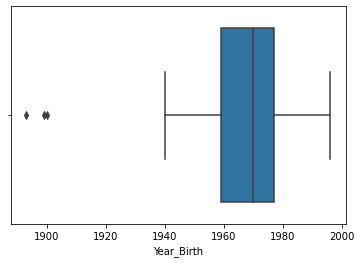

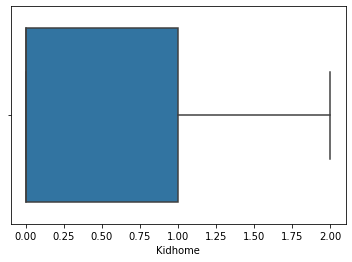

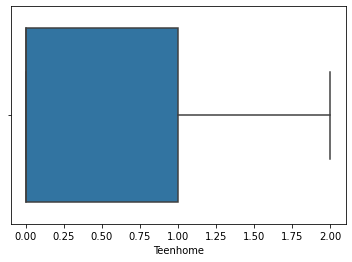

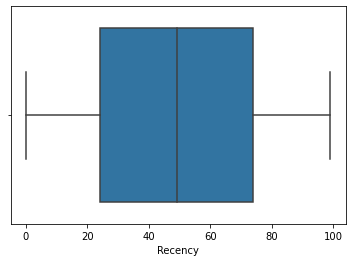

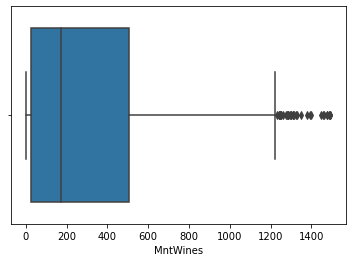

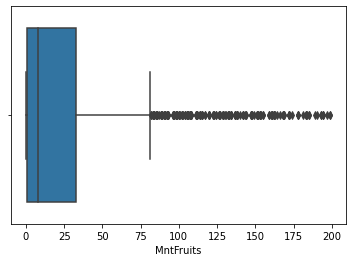

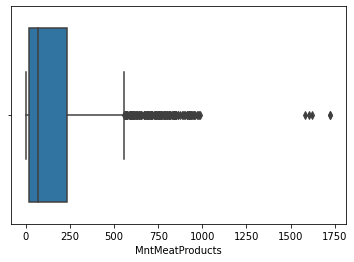

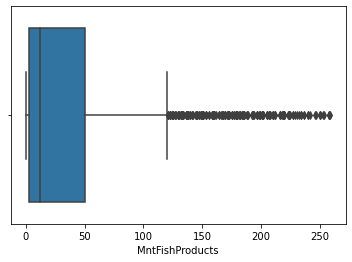

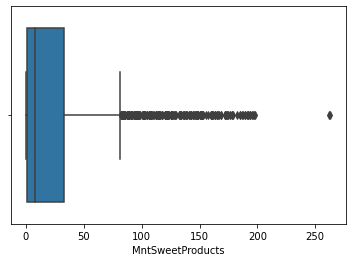

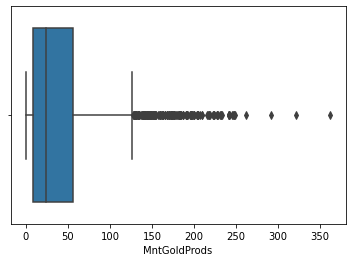

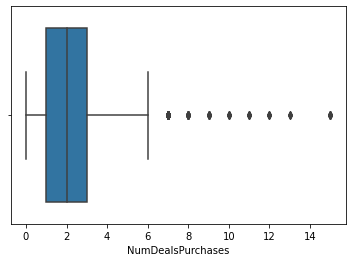

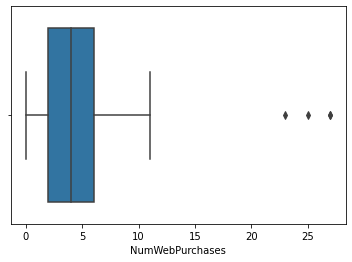

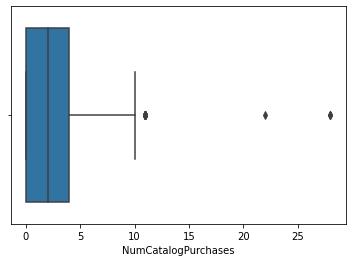

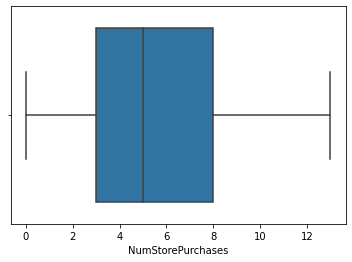

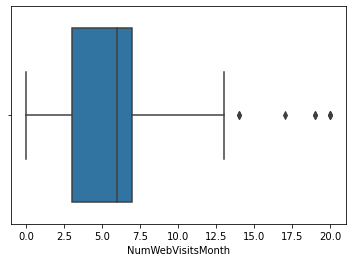

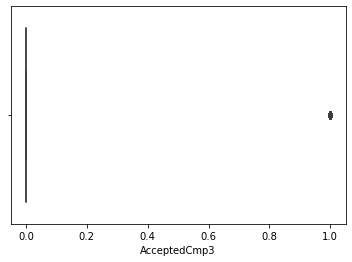

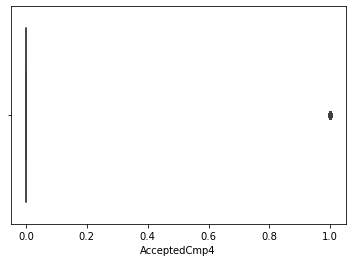

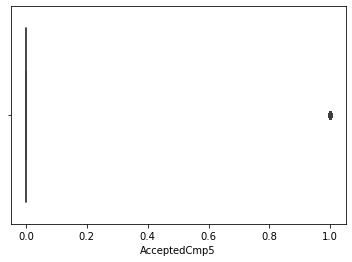

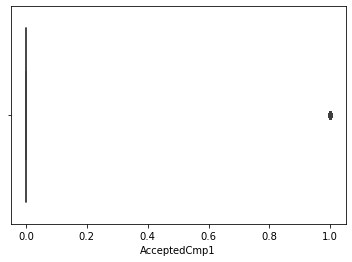

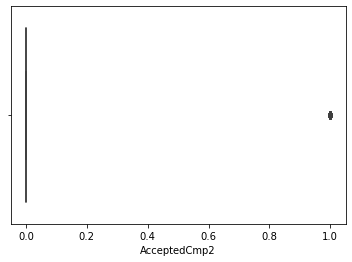

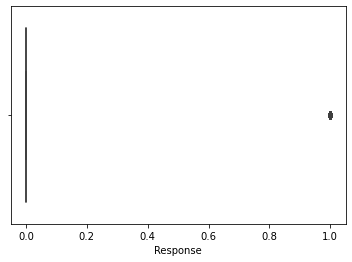

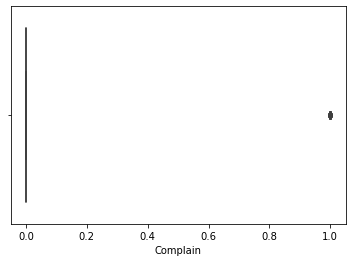

In [11]:
data1=data.select_dtypes(include=np.number)
for i in data1:
    sns.boxplot(data1[i])
    plt.show()

From this we could see that
* The DOB of customer varies from 1983 to 1996
* Number of kids at home varies from 0 to maximum of 2 kids
* Number of teens at home varies from 0 to maximum of 2 kids
* Purchase of customer ranges from the present day up to the 99 day from that day
* Most occurred education level is Gradution with the frequency of 1127 customers
* Most cusromers are married
* Most cusromers are from Serbia
* Income of customer are in the range of 1000 dollar to 666666 dollar, minimum of 51000 dollar, with 7500 dollar  being the most occurred. Income with 1% of income missing (i.e 24 customer income missing)

Handling missing data in income

In [12]:
#converting the Income column for suitable use
data.rename(columns ={' Income ': 'Income'}, inplace=True)
data['Income']=data['Income'].str.replace('$','')
data['Income']=data['Income'].str.replace(',','')
data['Income']=data['Income'].astype(float)
data['Income']

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2240, dtype: float64

In [13]:
data['Income'].isnull().sum()/len(data)*100

1.0714285714285714

In [14]:
data['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

<AxesSubplot:title={'center':'Income'}, xlabel='Income'>

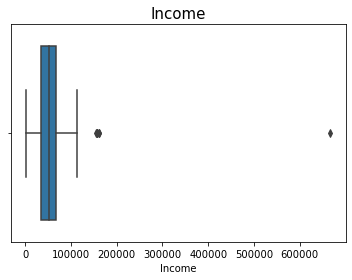

In [15]:
plt.title('Income', size=15)
sns.boxplot(x='Income', data=data)

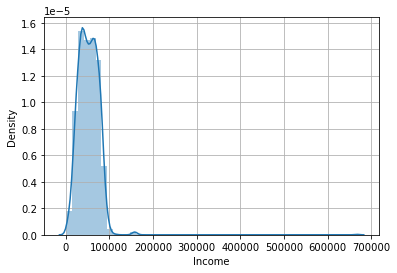

In [16]:
sns.distplot(data['Income'])
plt.grid()

In [17]:
data['Income']=data['Income'].fillna(data['Income'].median())
data['Income'].isnull().sum()

0

In [18]:
data.rename(columns ={'Year_Birth': 'Year Birth', 'Dt_Customer': 'DtCustomer',
                    'Marital_Status': 'Marital Status'}, inplace=True)
data.head()

Year Birth   Education Marital Status   Income  Kidhome  Teenhome  \
0        1970  Graduation       Divorced  84835.0        0         0   
1        1961  Graduation         Single  57091.0        0         0   
2        1958  Graduation        Married  67267.0        0         1   
3        1967  Graduation       Together  32474.0        1         1   
4        1989  Graduation         Single  21474.0        1         0   

  DtCustomer  Recency  MntWines  MntFruits  ...  NumStorePurchases  \
0    6/16/14        0       189        104  ...                  6   
1    6/15/14        0       464          5  ...                  7   
2    5/13/14        0       134         11  ...                  5   
3    5/11/14        0        10          0  ...                  2   
4     4/8/14        0         6         16  ...                  2   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  1             0             0             0             0   
1                  5             0             0             0             0   
2                  2             0             0             0             0   
3                  7             0             0             0             0   
4                  7             1             0             0             0   

   AcceptedCmp2  Response  Complain  Country  
0             0         1         0       SP  
1             1         1         0       CA  
2             0         0         0       US  
3             0         0         0      AUS  
4             0         1         0       SP  

[5 rows x 27 columns]

In [19]:
data['Year Birth']=data['Year Birth'].astype(np.int64)
data['Year Birth']

0       1970
1       1961
2       1958
3       1967
4       1989
        ... 
2235    1976
2236    1977
2237    1976
2238    1978
2239    1969
Name: Year Birth, Length: 2240, dtype: int64

In [20]:
data['DtCustomer']=pd.to_datetime(data['DtCustomer'])
data['DtCustomer']

0      2014-06-16
1      2014-06-15
2      2014-05-13
3      2014-05-11
4      2014-04-08
          ...    
2235   2013-03-07
2236   2013-01-22
2237   2012-12-03
2238   2012-11-29
2239   2012-09-01
Name: DtCustomer, Length: 2240, dtype: datetime64[ns]

In [21]:
data['Age']=date.today().year - data['Year Birth']

In [22]:
data['Age'].head()

0    53
1    62
2    65
3    56
4    34
Name: Age, dtype: int64

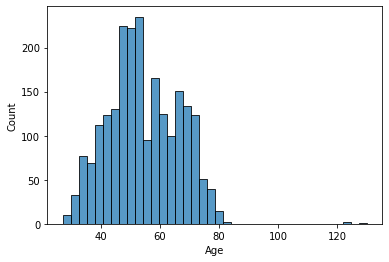

In [23]:
sns.histplot(x=data['Age'])
plt.show()

Two people has being living for the past 120 years

In [24]:
data=data[data['Age']<100]

data=data[data['Income']<600000]
data.shape

(2236, 28)

<AxesSubplot:xlabel='Age', ylabel='Count'>

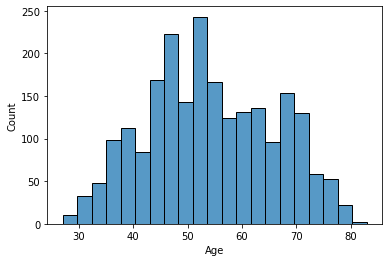

In [25]:
sns.histplot(x=data['Age'])

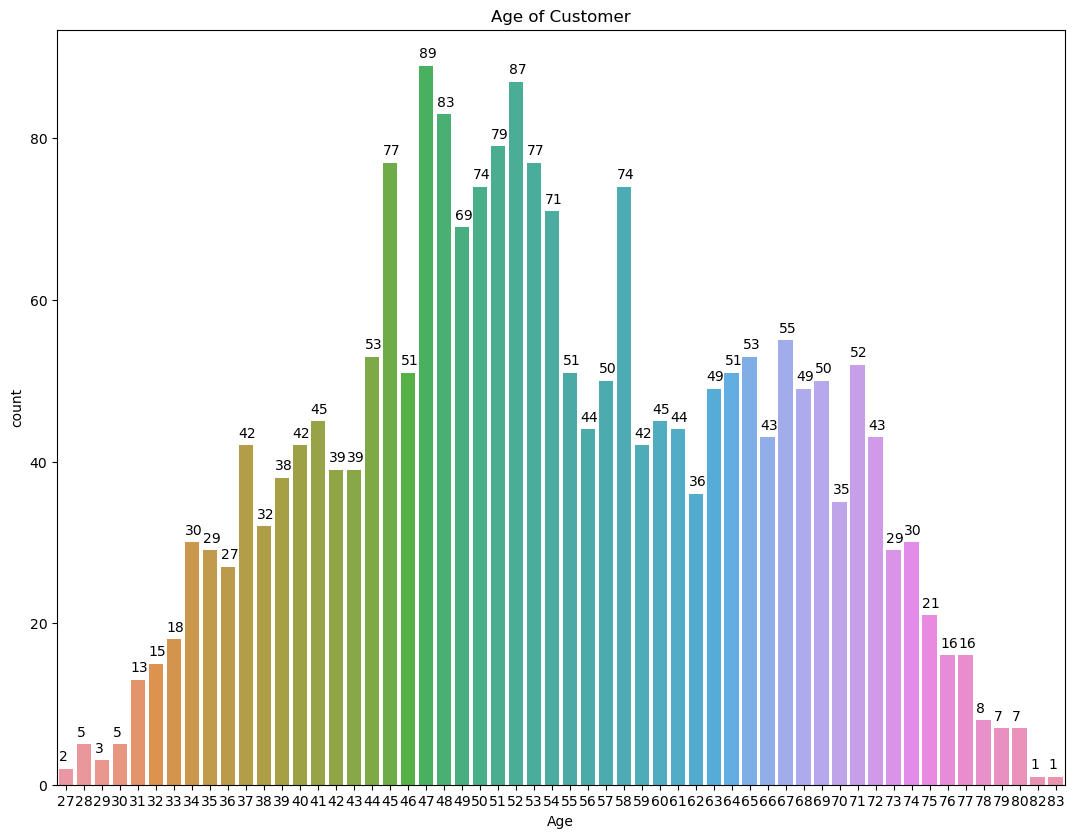

In [26]:
plt.figure(figsize=(13,10), dpi=100)
plt.title('Age of Customer')
ax=sns.countplot(x=data['Age'])

for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()),
               (p.get_x(), p.get_height()+1))
plt.show()

In [27]:
data['Age'].describe()

count    2236.000000
mean       54.101968
std        11.703281
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max        83.000000
Name: Age, dtype: float64

In [28]:
#Total amount spent by customer
data['Amount']= data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] +data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
data['Amount']

0       1190
1        577
2        251
3         11
4         91
        ... 
2235     689
2236      55
2237     309
2238    1383
2239    1078
Name: Amount, Length: 2236, dtype: int64

In [29]:
data.head()

Year Birth   Education Marital Status   Income  Kidhome  Teenhome  \
0        1970  Graduation       Divorced  84835.0        0         0   
1        1961  Graduation         Single  57091.0        0         0   
2        1958  Graduation        Married  67267.0        0         1   
3        1967  Graduation       Together  32474.0        1         1   
4        1989  Graduation         Single  21474.0        1         0   

  DtCustomer  Recency  MntWines  MntFruits  ...  AcceptedCmp3  AcceptedCmp4  \
0 2014-06-16        0       189        104  ...             0             0   
1 2014-06-15        0       464          5  ...             0             0   
2 2014-05-13        0       134         11  ...             0             0   
3 2014-05-11        0        10          0  ...             0             0   
4 2014-04-08        0         6         16  ...             1             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  Complain  Country  Age  \
0             0             0             0         1         0       SP   53   
1             0             0             1         1         0       CA   62   
2             0             0             0         0         0       US   65   
3             0             0             0         0         0      AUS   56   
4             0             0             0         1         0       SP   34   

   Amount  
0    1190  
1     577  
2     251  
3      11  
4      91  

[5 rows x 29 columns]

In [30]:
data.filter(regex='Mnt', axis=1)    #regex = regular expression

MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0          189        104              379              111               189   
1          464          5               64                7                 0   
2          134         11               59               15                 2   
3           10          0                1                0                 0   
4            6         16               24               11                 0   
...        ...        ...              ...              ...               ...   
2235       372         18              126               47                48   
2236         5         10               13                3                 8   
2237       185          2               88               15                 5   
2238       267         38              701              149               165   
2239       169         24              553              188                 0   

      MntGoldProds  
0              218  
1               37  
2               30  
3                0  
4               34  
...            ...  
2235            78  
2236            16  
2237            14  
2238            63  
2239           144  

[2236 rows x 6 columns]

In [31]:
data['Wine%']= (data['MntWines']*100)/data['Amount']

In [32]:
data['Other']=data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']

In [33]:
data['Other%']=(data['Other']*100)/data['Amount']

In [34]:
data.head()

Year Birth   Education Marital Status   Income  Kidhome  Teenhome  \
0        1970  Graduation       Divorced  84835.0        0         0   
1        1961  Graduation         Single  57091.0        0         0   
2        1958  Graduation        Married  67267.0        0         1   
3        1967  Graduation       Together  32474.0        1         1   
4        1989  Graduation         Single  21474.0        1         0   

  DtCustomer  Recency  MntWines  MntFruits  ...  AcceptedCmp1  AcceptedCmp2  \
0 2014-06-16        0       189        104  ...             0             0   
1 2014-06-15        0       464          5  ...             0             1   
2 2014-05-13        0       134         11  ...             0             0   
3 2014-05-11        0        10          0  ...             0             0   
4 2014-04-08        0         6         16  ...             0             0   

   Response  Complain  Country  Age  Amount      Wine%  Other     Other%  
0         1         0       SP   53    1190  15.882353   1001  84.117647  
1         1         0       CA   62     577  80.415945    113  19.584055  
2         0         0       US   65     251  53.386454    117  46.613546  
3         0         0      AUS   56      11  90.909091      1   9.090909  
4         1         0       SP   34      91   6.593407     85  93.406593  

[5 rows x 32 columns]

In [35]:
data.filter(regex='MntWines|Amount|%', axis=1).round(2)

MntWines  Amount  Wine%  Other%
0          189    1190  15.88   84.12
1          464     577  80.42   19.58
2          134     251  53.39   46.61
3           10      11  90.91    9.09
4            6      91   6.59   93.41
...        ...     ...    ...     ...
2235       372     689  53.99   46.01
2236         5      55   9.09   90.91
2237       185     309  59.87   40.13
2238       267    1383  19.31   80.69
2239       169    1078  15.68   84.32

[2236 rows x 4 columns]

In [36]:
data['Total Purchase']=data['NumDealsPurchases']+data['NumWebPurchases']+data['NumCatalogPurchases']+data['NumStorePurchases']+data['NumWebVisitsMonth']
data['Total Purchase'].head()

0    16
1    23
2    13
3    11
4    15
Name: Total Purchase, dtype: int64

In [37]:
data['Total Purchase'].head()

0    16
1    23
2    13
3    11
4    15
Name: Total Purchase, dtype: int64

In [38]:
data.filter(regex='Deal|Web|Catalog|Store|Total Purchase', axis=1)

NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0                     1                4                    4   
1                     1                7                    3   
2                     1                3                    2   
3                     1                1                    0   
4                     2                3                    1   
...                 ...              ...                  ...   
2235                  2                5                    2   
2236                  1                1                    0   
2237                  2                6                    1   
2238                  1                5                    4   
2239                  1                8                    5   

      NumStorePurchases  NumWebVisitsMonth  Total Purchase  
0                     6                  1              16  
1                     7                  5              23  
2                     5                  2              13  
3                     2                  7              11  
4                     2                  7              15  
...                 ...                ...             ...  
2235                 11                  4              24  
2236                  3                  8              13  
2237                  5                  8              22  
2238                 10                  3              23  
2239                  4                  7              25  

[2236 rows x 6 columns]

In [39]:
data.head()

Year Birth   Education Marital Status   Income  Kidhome  Teenhome  \
0        1970  Graduation       Divorced  84835.0        0         0   
1        1961  Graduation         Single  57091.0        0         0   
2        1958  Graduation        Married  67267.0        0         1   
3        1967  Graduation       Together  32474.0        1         1   
4        1989  Graduation         Single  21474.0        1         0   

  DtCustomer  Recency  MntWines  MntFruits  ...  AcceptedCmp2  Response  \
0 2014-06-16        0       189        104  ...             0         1   
1 2014-06-15        0       464          5  ...             1         1   
2 2014-05-13        0       134         11  ...             0         0   
3 2014-05-11        0        10          0  ...             0         0   
4 2014-04-08        0         6         16  ...             0         1   

   Complain  Country  Age  Amount      Wine%  Other     Other%  Total Purchase  
0         0       SP   53    1190  15.882353   1001  84.117647              16  
1         0       CA   62     577  80.415945    113  19.584055              23  
2         0       US   65     251  53.386454    117  46.613546              13  
3         0      AUS   56      11  90.909091      1   9.090909              11  
4         0       SP   34      91   6.593407     85  93.406593              15  

[5 rows x 33 columns]

In [40]:
data['Store%']= (data['NumStorePurchases']*100)/data['Total Purchase']
data['Other1']= data['NumDealsPurchases']+data['NumWebPurchases']+data['NumCatalogPurchases']+data['NumWebVisitsMonth']
data['Other1%']= (data['Other1']*100)/data['Total Purchase']
data.filter(regex= 'Store|Total|Store%|Other1%', axis=1).round(2)

NumStorePurchases  Total Purchase  Store%  Other1%
0                     6              16   37.50    62.50
1                     7              23   30.43    69.57
2                     5              13   38.46    61.54
3                     2              11   18.18    81.82
4                     2              15   13.33    86.67
...                 ...             ...     ...      ...
2235                 11              24   45.83    54.17
2236                  3              13   23.08    76.92
2237                  5              22   22.73    77.27
2238                 10              23   43.48    56.52
2239                  4              25   16.00    84.00

[2236 rows x 4 columns]

In [41]:
data.head()

Year Birth   Education Marital Status   Income  Kidhome  Teenhome  \
0        1970  Graduation       Divorced  84835.0        0         0   
1        1961  Graduation         Single  57091.0        0         0   
2        1958  Graduation        Married  67267.0        0         1   
3        1967  Graduation       Together  32474.0        1         1   
4        1989  Graduation         Single  21474.0        1         0   

  DtCustomer  Recency  MntWines  MntFruits  ...  Country  Age  Amount  \
0 2014-06-16        0       189        104  ...       SP   53    1190   
1 2014-06-15        0       464          5  ...       CA   62     577   
2 2014-05-13        0       134         11  ...       US   65     251   
3 2014-05-11        0        10          0  ...      AUS   56      11   
4 2014-04-08        0         6         16  ...       SP   34      91   

       Wine%  Other     Other%  Total Purchase     Store%  Other1    Other1%  
0  15.882353   1001  84.117647              16  37.500000      10  62.500000  
1  80.415945    113  19.584055              23  30.434783      16  69.565217  
2  53.386454    117  46.613546              13  38.461538       8  61.538462  
3  90.909091      1   9.090909              11  18.181818       9  81.818182  
4   6.593407     85  93.406593              15  13.333333      13  86.666667  

[5 rows x 36 columns]

In [42]:
campaigns=pd.DataFrame(data.iloc[:,19:24].sum(), columns=['Cam_Amount']).reset_index()
campaigns

index  Cam_Amount
0  AcceptedCmp3         163
1  AcceptedCmp4         167
2  AcceptedCmp5         162
3  AcceptedCmp1         144
4  AcceptedCmp2          30

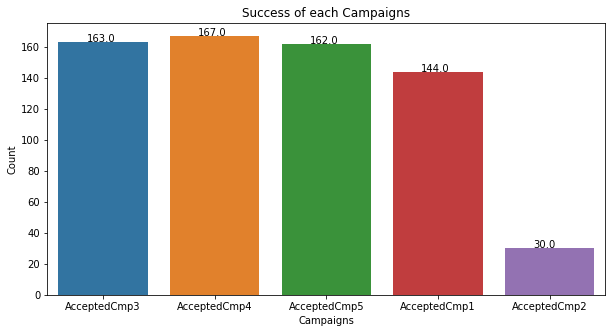

In [43]:
plt.figure(figsize=(10,5))
plt.title('Success of each Campaigns')
yx= sns.barplot(x='index', y='Cam_Amount', data=campaigns)
plt.xlabel('Campaigns')
plt.ylabel('Count')

for p in yx.patches:
    yx.annotate('{:}'.format(p.get_height()),
               (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

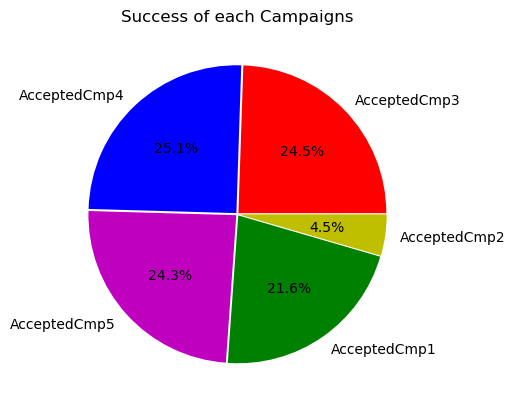

In [44]:
#pie plot
plt.rcdefaults()

sizes = [163,167, 162, 144,30]
color=['r','b','m','g','y']
label=campaigns['index']
explode=[0.01,0.01,0.01,0.01,0.01]
plt.pie(sizes, colors = color, labels = label, explode = explode, autopct='%1.1f%%')
plt.title('Success of each Campaigns')
plt.show()

In [45]:
revenue=pd.DataFrame(data.iloc[:,9:14].sum(), columns=['rev_generated']).reset_index()
revenue

index  rev_generated
0         MntFruits          58753
1   MntMeatProducts         373375
2   MntFishProducts          83931
3  MntSweetProducts          60552
4      MntGoldProds          98346

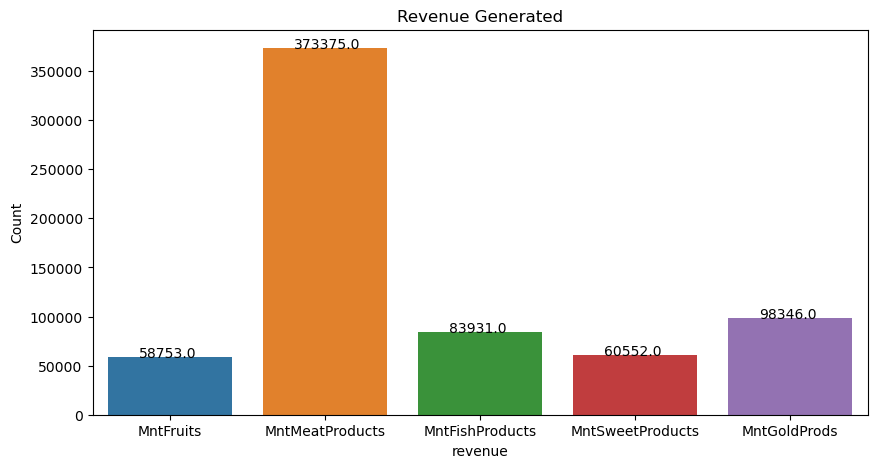

In [46]:
plt.figure(figsize=(10,5))
plt.title('Revenue Generated')
yx= sns.barplot(x='index', y='rev_generated', data=revenue)
plt.xlabel('revenue')
plt.ylabel('Count')

for p in yx.patches:
    yx.annotate('{:}'.format(p.get_height()),
               (p.get_x()+0.2, p.get_height()+0.01))
plt.show()

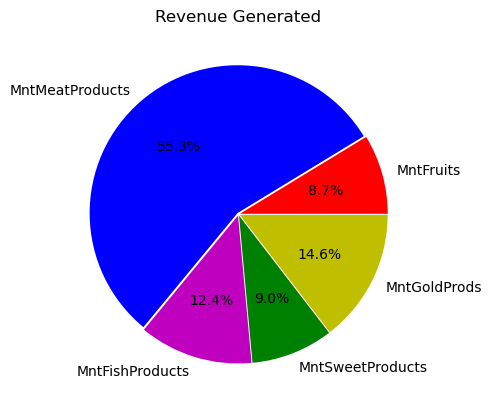

In [47]:
#pie plot
plt.rcdefaults()

sizes = [58753,373375, 83931, 60552,98346]
values=revenue['rev_generated']
color=['r','b','m','g','y']
label=revenue['index']
explode=[0.01,0.01,0.01,0.01,0.01]
plt.pie(values, colors = color, labels = label, explode = explode, autopct='%1.1f%%')
plt.title('Revenue Generated')
plt.show()


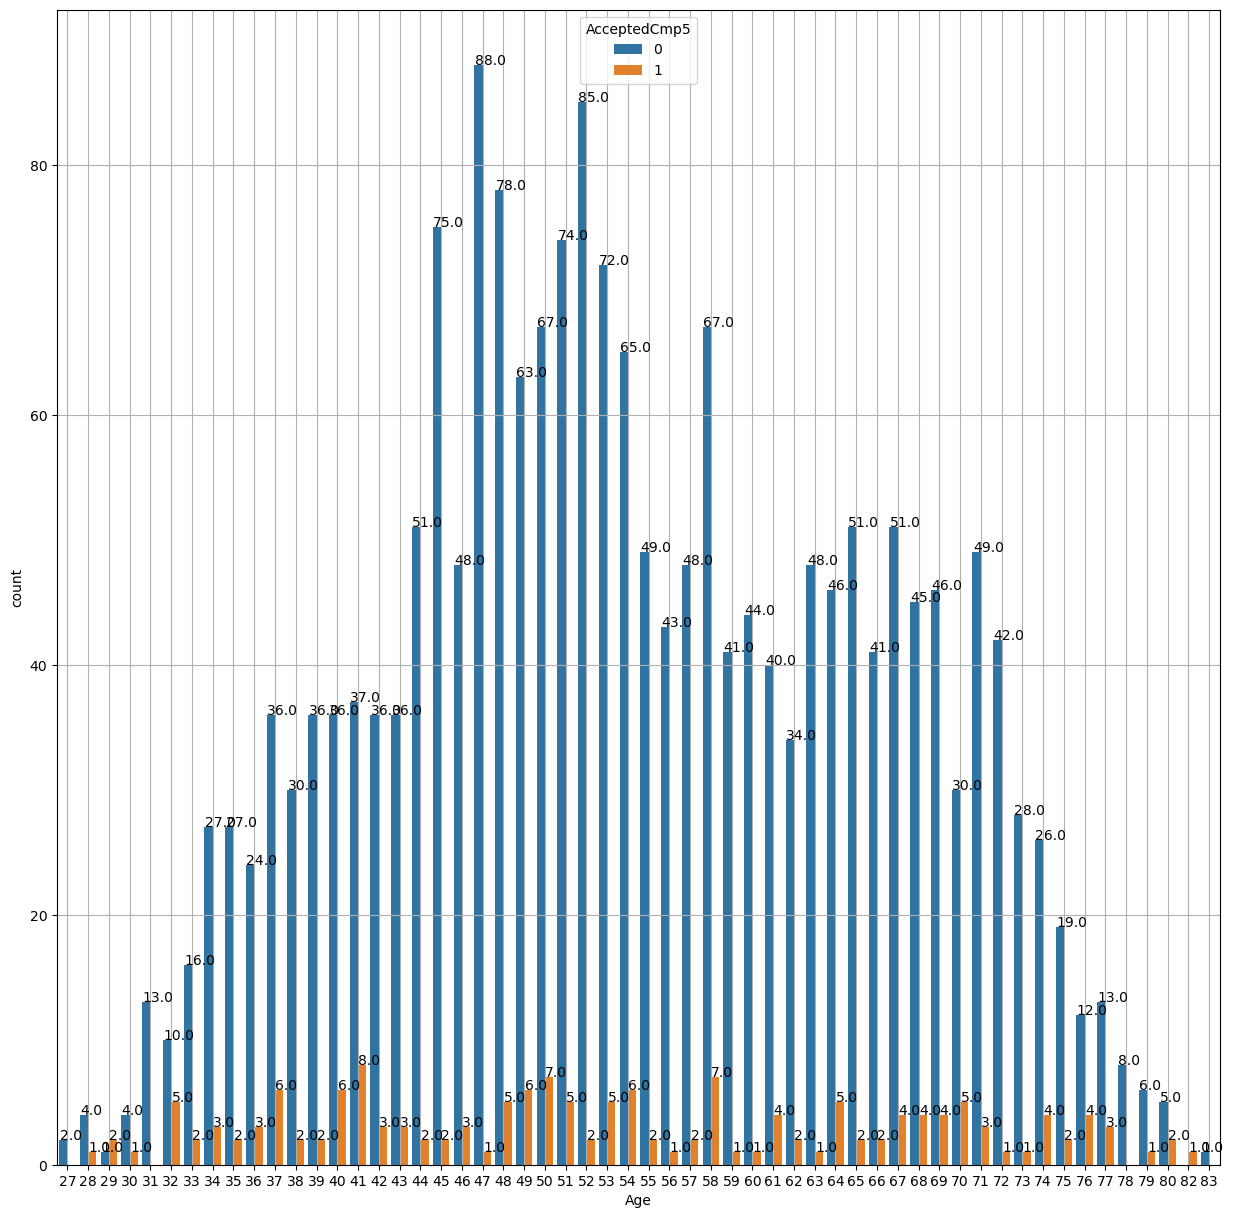

In [48]:
#Question 11
plt.figure(figsize=(15,15))
a=sns.countplot(x='Age',hue='AcceptedCmp5',data=data)
for p in a.patches:
    a.annotate('{:}'.format(p.get_height()),
               (p.get_x()+0.02, p.get_height()+0.01))
plt.grid()
plt.show()

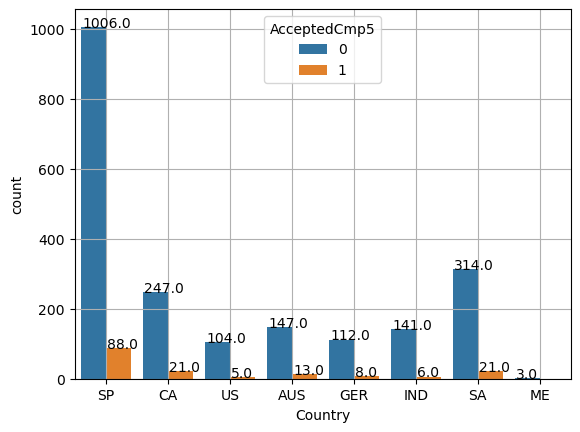

In [49]:
#Question 11
a=sns.countplot(x='Country',hue='AcceptedCmp5',data=data)
for p in a.patches:
    a.annotate('{:}'.format(p.get_height()),
               (p.get_x()+0.02, p.get_height()+0.01))
plt.grid()
plt.show()

In [50]:
data['Dependents']= data['Kidhome']+data['Teenhome']
data.head()

Year Birth   Education Marital Status   Income  Kidhome  Teenhome  \
0        1970  Graduation       Divorced  84835.0        0         0   
1        1961  Graduation         Single  57091.0        0         0   
2        1958  Graduation        Married  67267.0        0         1   
3        1967  Graduation       Together  32474.0        1         1   
4        1989  Graduation         Single  21474.0        1         0   

  DtCustomer  Recency  MntWines  MntFruits  ...  Age  Amount      Wine%  \
0 2014-06-16        0       189        104  ...   53    1190  15.882353   
1 2014-06-15        0       464          5  ...   62     577  80.415945   
2 2014-05-13        0       134         11  ...   65     251  53.386454   
3 2014-05-11        0        10          0  ...   56      11  90.909091   
4 2014-04-08        0         6         16  ...   34      91   6.593407   

   Other     Other%  Total Purchase     Store%  Other1    Other1%  Dependents  
0   1001  84.117647              16  37.500000      10  62.500000           0  
1    113  19.584055              23  30.434783      16  69.565217           0  
2    117  46.613546              13  38.461538       8  61.538462           1  
3      1   9.090909              11  18.181818       9  81.818182           2  
4     85  93.406593              15  13.333333      13  86.666667           1  

[5 rows x 37 columns]

Text(0.5, 1.0, 'TOTAL AMOUNT SPENT V/S DEPENDENTS')

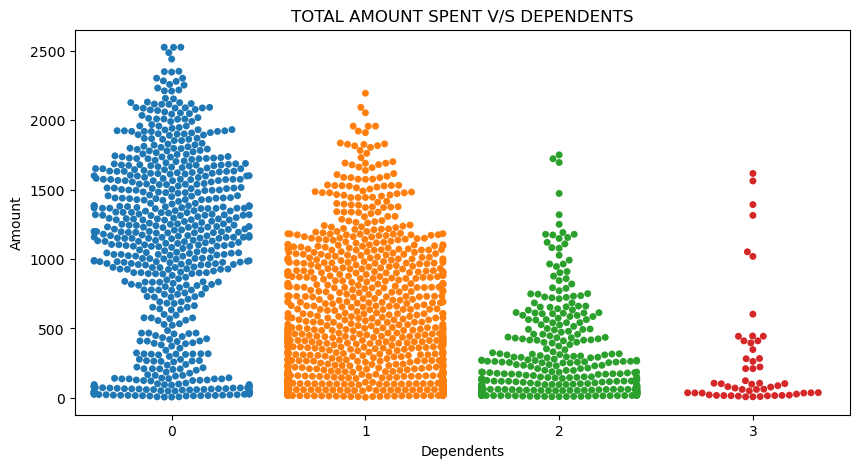

In [51]:
A=plt.figure(figsize=(10,5))
sns.swarmplot(x='Dependents', y='Amount', data=data)
plt.title('TOTAL AMOUNT SPENT V/S DEPENDENTS')

The amount spent by an individual is dependent on the dependents(i.e kid at home and teens at home). 
Individual with no kidhome or teenshome spend more and individual with 1 or 2 or 3 kidhome or teenshome spend less


Text(0.5, 1.0, 'TOTAL PURCHASE V/S DEPENDENTS')

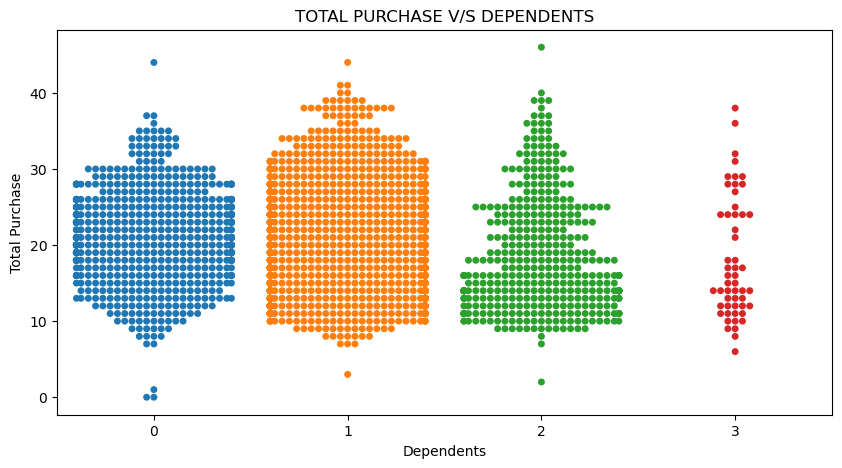

In [52]:
A=plt.figure(figsize=(10,5))
sns.swarmplot(x='Dependents', y='Total Purchase', data=data)
plt.title('TOTAL PURCHASE V/S DEPENDENTS')

The total purchase of  an individual is not dependent on the dependents(i.e kid at home and teens at home). 
Individual with 1 and 0 kidhome or teenshome purchase more and individual with 2 and 3 kidhome or teenshome purchase less


In [53]:
data[['Complain','Income','Response','Age']].corr()

Complain    Income  Response       Age
Complain  1.000000 -0.027871  0.000167  0.004450
Income   -0.027871  1.000000  0.161121  0.198835
Response  0.000167  0.161121  1.000000 -0.018557
Age       0.004450  0.198835 -0.018557  1.000000

From this we could deduce that Income and Age are strongly correlated compare to others 

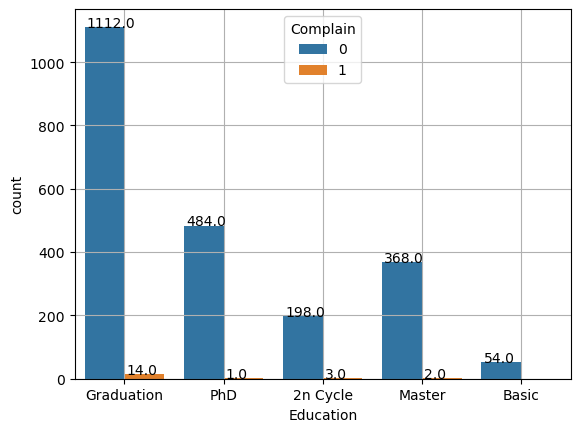

In [54]:
B=sns.countplot(x='Education',hue='Complain',data=data)
for p in B.patches:
    B.annotate('{:}'.format(p.get_height()),
               (p.get_x()+0.02, p.get_height()+0.01))
plt.grid()
plt.show()

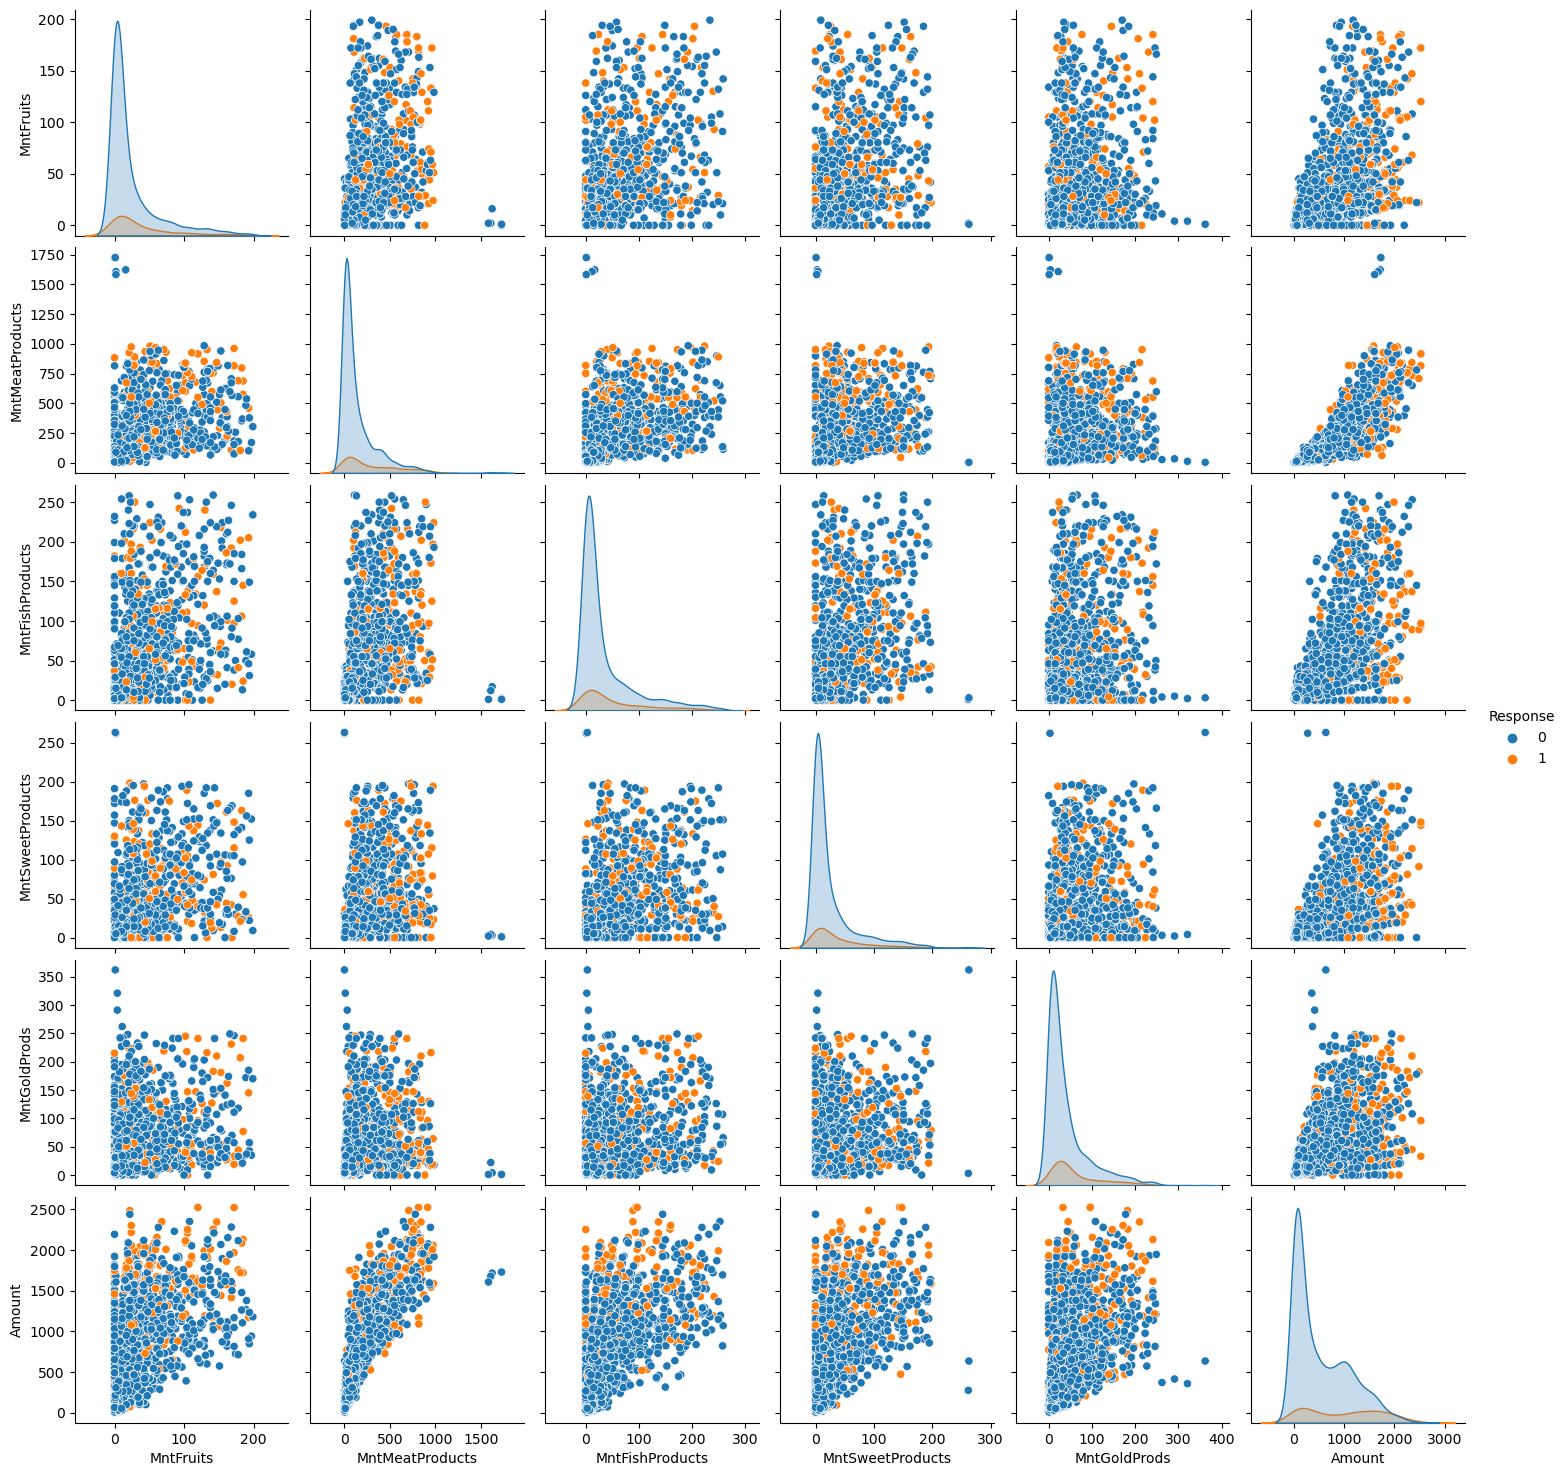

In [55]:
sns.pairplot(data= data, hue='Response',
             vars=['MntFruits', 'MntMeatProducts', 
              'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Amount'])

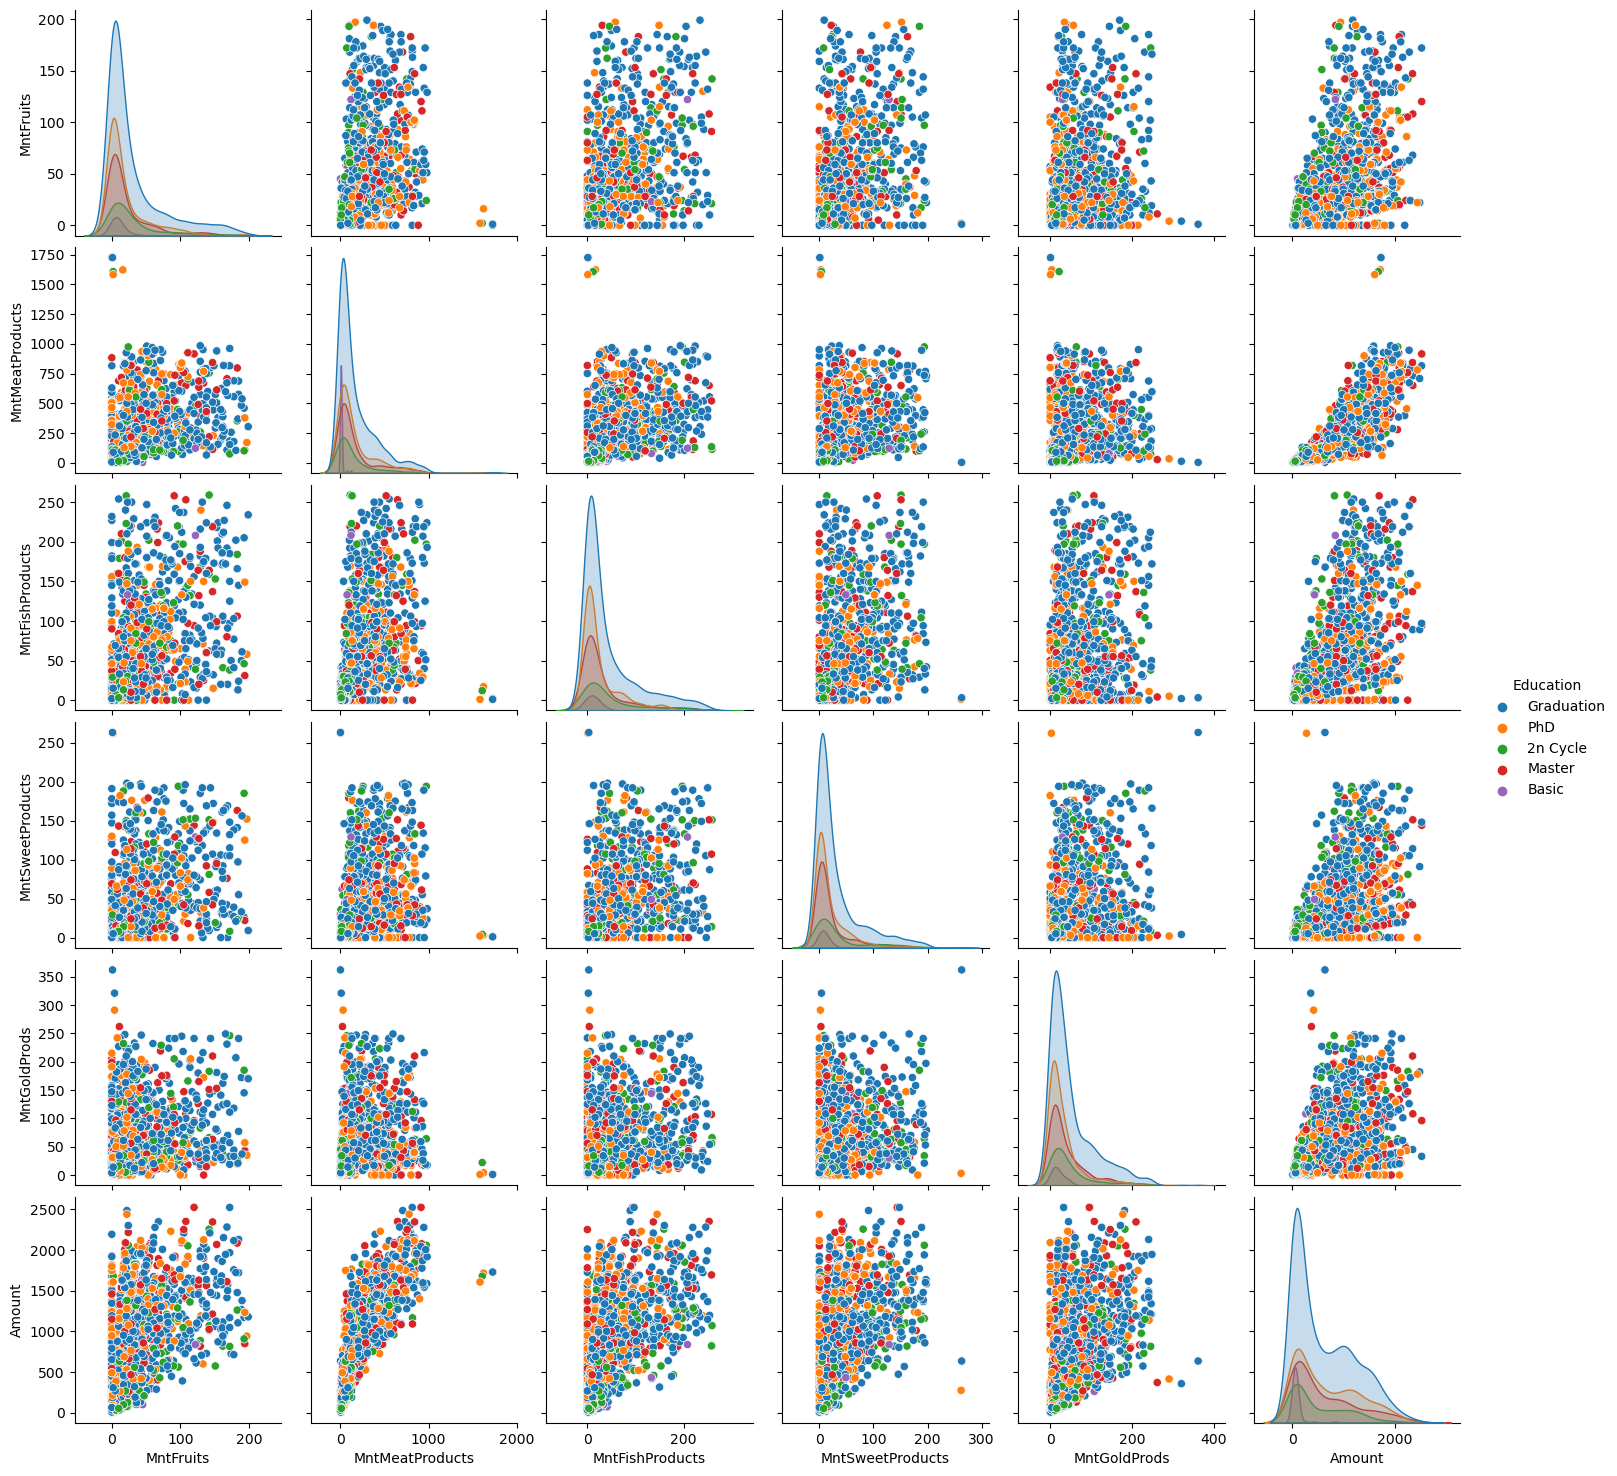

In [56]:
sns.pairplot(data= data, hue='Education',
        vars=['MntFruits', 'MntMeatProducts', 
              'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Amount'])

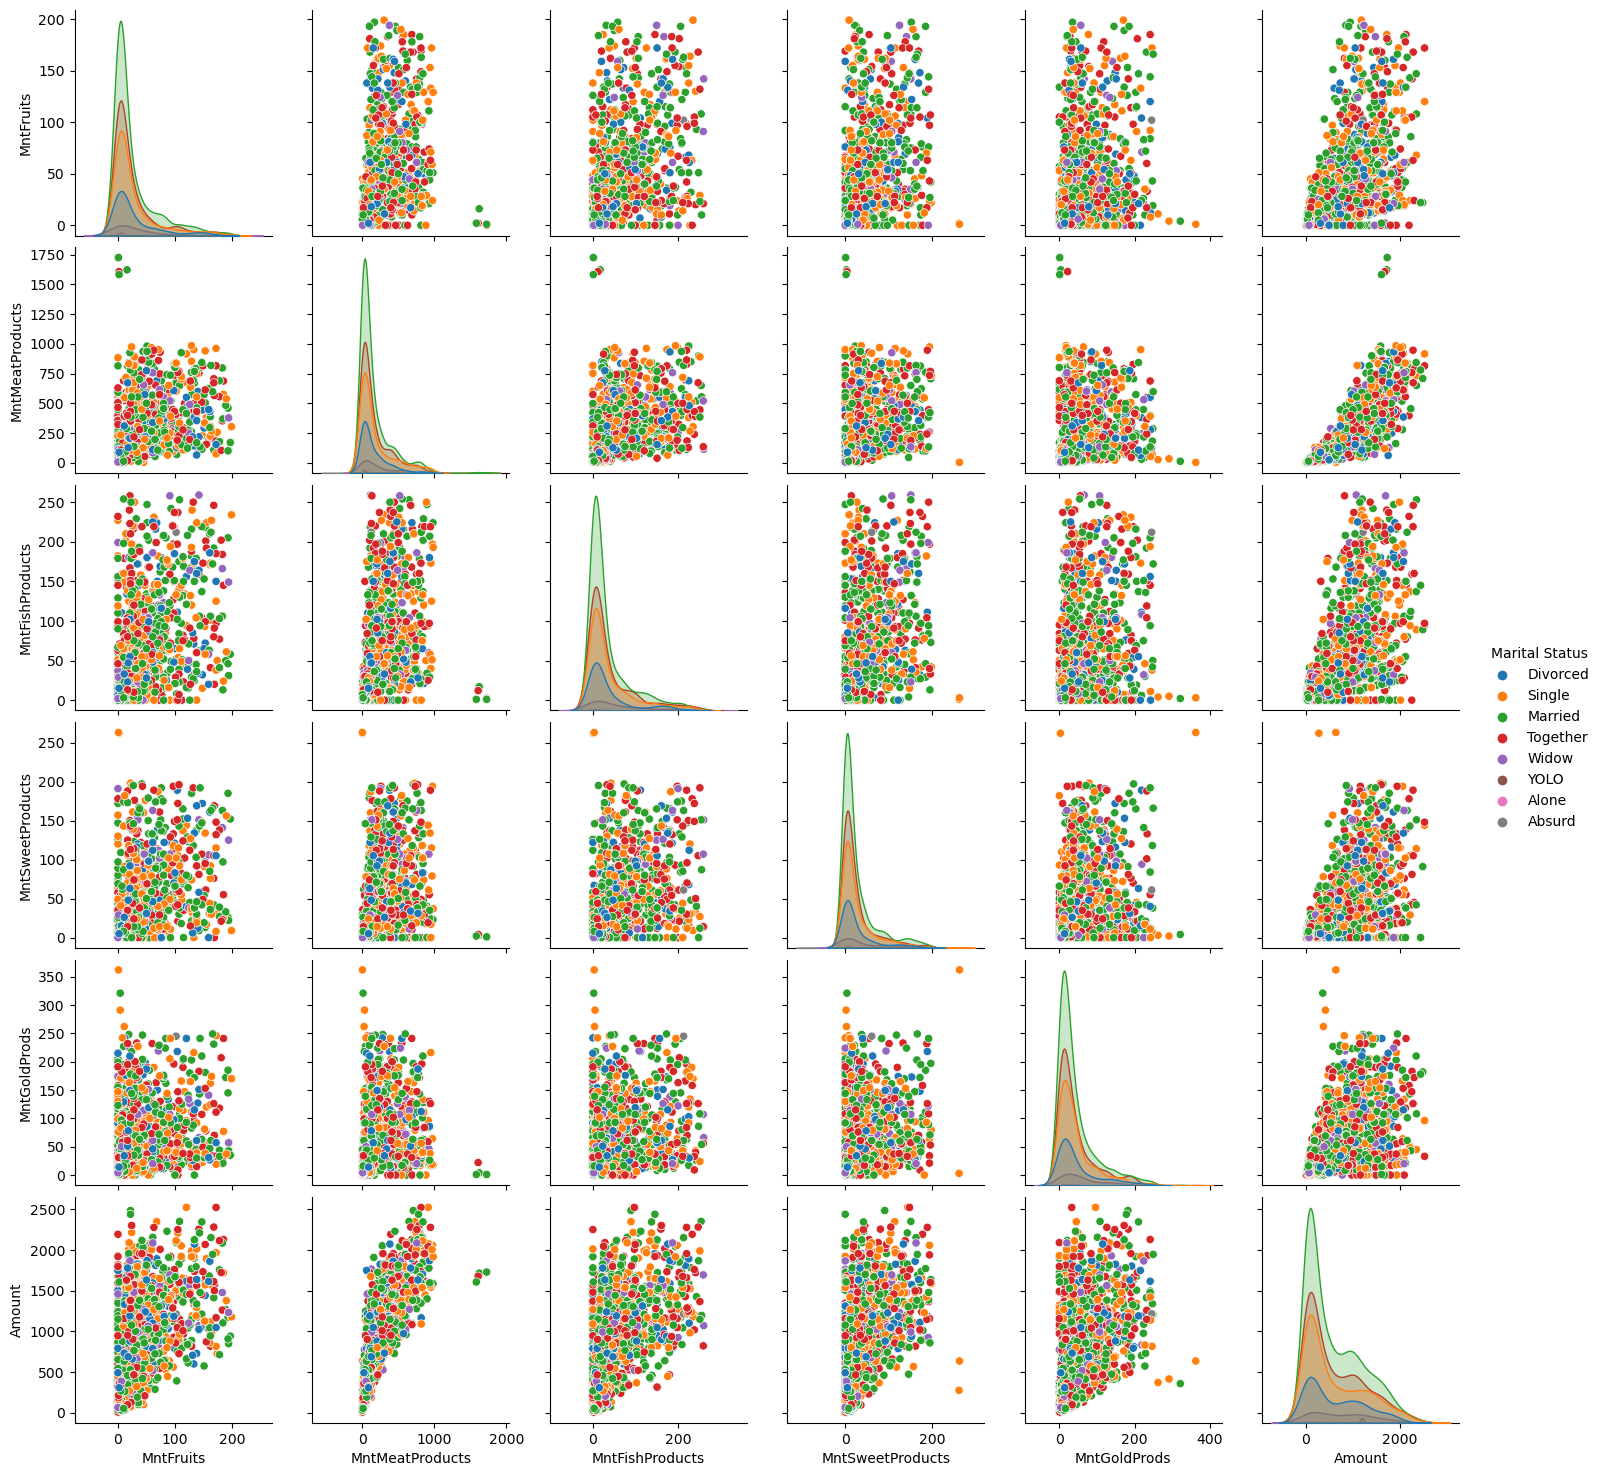

In [57]:
sns.pairplot(data= data, hue='Marital Status',
        vars=['MntFruits', 'MntMeatProducts', 
              'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Amount'])